In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.shape

(20640, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [8]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [11]:
data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [14]:
data['ocean_proximity'] = data['ocean_proximity'].map({"<1H OCEAN": 0, "INLAND": 1, "ISLAND": 2, "NEAR BAY": 3, "ISLAND": 4})

In [15]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,3.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,3.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,3.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,3.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,3.0
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,1.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,1.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,1.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,1.0


In [16]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
min_max = MinMaxScaler()
X_test = min_max.fit_transform(X_test)
X_train = min_max.transform(X_train)

In [22]:
model = Sequential(
    [
        Dense(1000, activation='relu', input_shape=[X_train.shape[1],]),
        Dense(500, activation='relu'),
        Dense(250, activation='relu'),
        Dense(1, activation='linear')
    ]
)
model.summary()

c:\Users\Richa\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1000)           │        10,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 500)            │       500,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 250)            │       125,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           251 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 636,001 (2.43 MB)

 Trainable params: 636,001 (2.43 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
es = EarlyStopping(monitor='val_loss',mode='min',patience=50, restore_best_weights=True)

In [24]:
history = model.fit(X_train, y_train, validation_data= (X_test, y_test), callbacks=[es], epochs=10, batch_size=50, verbose=1)

Epoch 1/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 55436136448.0000 - mae: 206059.9531 - val_loss: 56313589760.0000 - val_mae: 206490.6875
Epoch 2/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 55408783360.0000 - mae: 205096.8594 - val_loss: 53700210688.0000 - val_mae: 200062.6250
Epoch 3/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 51823955968.0000 - mae: 195913.0625 - val_loss: 47696846848.0000 - val_mae: 184454.1094
Epoch 4/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 44331687936.0000 - mae: 176686.6719 - val_loss: 37980860416.0000 - val_mae: 156049.7188
Epoch 5/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34596999168.0000 - mae: 146366.0312 - val_loss: 25980391424.0000 - val_mae: 118664.5703
Epoch 6/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22486904832.0000 - mae: 108180.7266 - val_loss: 15962273792.0000 - val_mae: 91354.4453
Epoch 7/10
327/327 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 14248679424.0000 - mae: 88632.7812 - val_loss: 136815

In [26]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,mean_squared_log_error

y_pred = model.predict(X_test)
print("mae :", mean_absolute_error(y_test,y_pred))
print("mse :", mean_squared_error(y_test,y_pred))
print("mae :", mean_squared_log_error(y_test,y_pred))
print("score :", r2_score(y_test,y_pred))

128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
mae : 92864.00470623317
mse : 13676087562.958485
mae : 0.3573721865672118
score : -6.63082210010657e-05


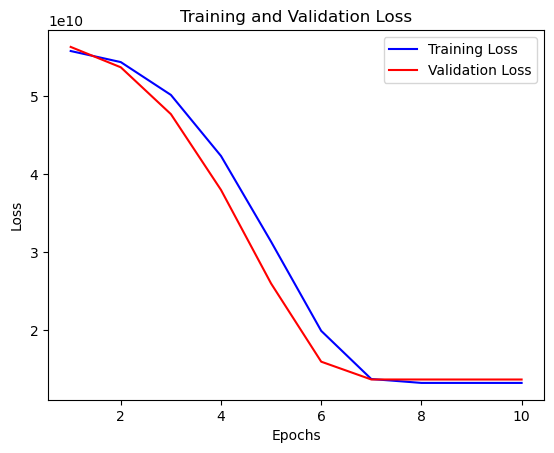

In [27]:
# Get the training and validation loss from the history object
training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)
# Plot the training and validation loss
plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')

# Label the plot
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plot
plt.show()

511/511 ━━━━━━━━━━━━━━━━━━━━ 0s 935us/step
128/128 ━━━━━━━━━━━━━━━━━━━━ 0s 988us/step


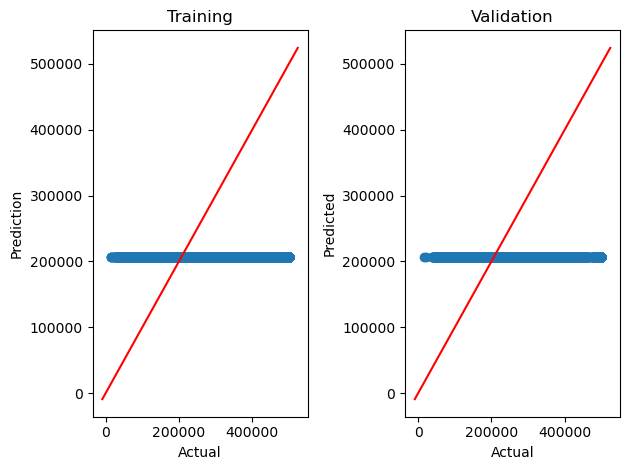

In [29]:
# Specify the dimensions 
fig, axes = plt.subplots(1,2)

# This makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train))
axes[0].set_xlabel('Actual', fontsize=10)
axes[0].set_ylabel('Prediction', fontsize=10)
axes[0].set_title('Training')

# Add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')

# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test))
axes[1].set_xlabel('Actual', fontsize=10)
axes[1].set_ylabel('Predicted', fontsize=10)
axes[1].set_title('Validation')

# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# Tight layout
fig.tight_layout()
plt.show()

In [32]:
def pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity):
    features = np.array([longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity])
    features_scaled = min_max.fit_transform([features])
    results = model.predict(features_scaled).reshape(1,-1)
    return results[0]

In [33]:
longitude = -122.2300
latitude  = 37.8800
housing_median_age  = 41.0000
total_rooms        = 880.0000
total_bedrooms   =  129.0000
population     = 322.0000
households          =    126.0000
median_income       =      8.3252
ocean_proximity       =     3.0000

price = pred(longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


In [34]:
model.save("model_ann.h5")

import pickle
pickle.dump(min_max,open('scaler.pkl','wb'))

In [35]:
import sklearn
import tensorflow as tf
import keras

print("scikit-learn version:", sklearn.__version__)
print("TensorFlow version:", tf.__version__)
print("Keras version:", keras.__version__)

scikit-learn version: 1.3.0
TensorFlow version: 2.16.1
Keras version: 3.3.2
